<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import files
files.upload()

Saving personality_datasert.csv to personality_datasert (1).csv
Saving personality_dataset.csv to personality_dataset (1).csv


{'personality_datasert (1).csv': b'Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality\n4.0,No,4.0,6.0,No,13.0,5.0,Extrovert\n9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert\n9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert\n0.0,No,6.0,7.0,No,14.0,8.0,Extrovert\n3.0,No,9.0,4.0,No,8.0,5.0,Extrovert\n1.0,No,7.0,5.0,No,6.0,6.0,Extrovert\n4.0,No,9.0,3.0,No,7.0,7.0,Extrovert\n2.0,No,8.0,4.0,No,7.0,8.0,Extrovert\n10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert\n0.0,No,8.0,6.0,No,13.0,8.0,Extrovert\n3.0,No,9.0,6.0,No,15.0,5.0,Extrovert\n10.0,Yes,3.0,1.0,Yes,4.0,0.0,Introvert\n3.0,No,6.0,7.0,No,14.0,10.0,Extrovert\n3.0,No,6.0,4.0,No,10.0,7.0,Extrovert\n6.0,Yes,3.0,0.0,Yes,1.0,3.0,Introvert\n0.0,No,4.0,4.0,No,8.0,8.0,Extrovert\n9.0,Yes,0.0,0.0,Yes,0.0,0.0,Introvert\n1.0,No,5.0,6.0,No,10.0,4.0,Extrovert\n5.0,Yes,3.0,0.0,Yes,4.0,2.0,Introvert\n1.0,No,7.0,5.0,No,12.0,5.0,Extrovert\n10.0,Yes,3.0,1.0,Yes,2.0,1.0,Introvert\n2.0,No,8.0,4.0,No,13

In [10]:
import pandas as pd
import numpy as np
import zipfile
import io
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv("personality_dataset.csv")

In [9]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2900, 8)
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [18]:
#Handling missing values
df = df.dropna()
print(df.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


In [12]:
#Encode categorical variables if any
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [20]:
#Define features (X) and target (y)
X = df.drop("Personality", axis=1)
y = df["Personality"]

In [19]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
#Feature scaling (not required for Random Forest, but okay)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")   # decimal + percentage

print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.9012 (90.12%)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       255
           1       0.88      0.93      0.90       241

    accuracy                           0.90       496
   macro avg       0.90      0.90      0.90       496
weighted avg       0.90      0.90      0.90       496



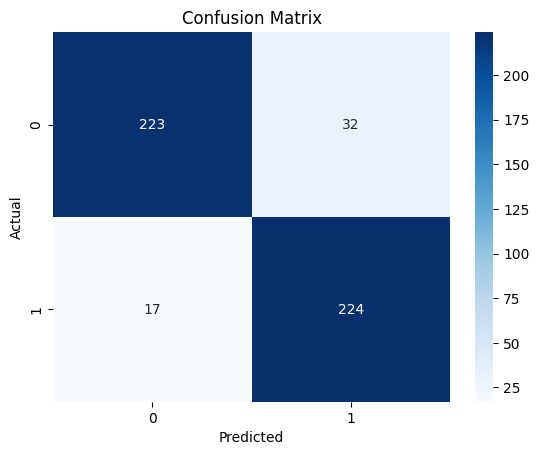

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

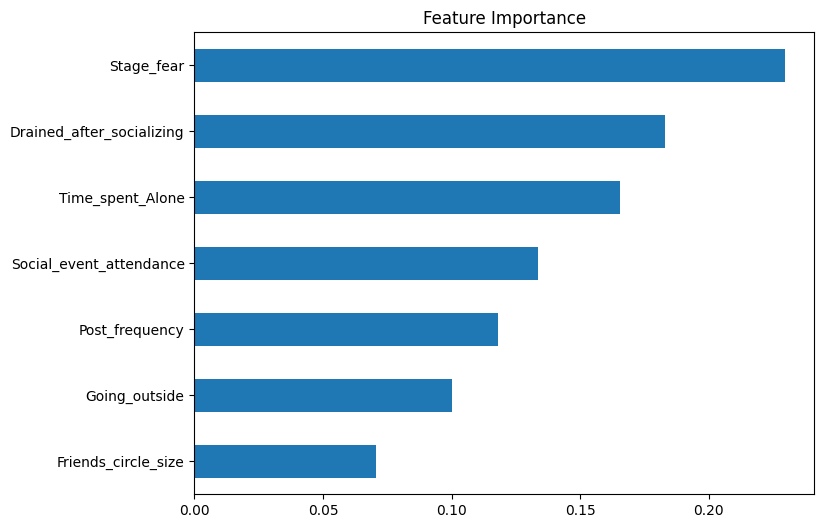

In [26]:
#Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()